In [3]:
import pandas as pd

In [ ]:
# Открываем файл и облегчаем типы данных для уменьшения объема используемой памяти:

In [6]:
train = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Python\\HW 3 - Pandas\\train-001.csv', sep=',', index_col=0,
                       dtype = {'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16', 
                                'content_type_id': 'int8', 'task_container_id': 'int16', 'user_answer': 'int8', 
                                'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32', 
                                'prior_question_had_explanation': 'boolean'
                               }
                      )

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(1), int8(3)
memory usage: 3.1 GB


In [8]:
# Смотрим, какие есть данные в колонках

In [9]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [11]:
#TRAIN.CSV
#row_id: (int64) ID code for the row.
#timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.
#user_id: (int32) ID code for the user.
#content_id: (int16) ID code for the user interaction
#content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.
#task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.
#user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
#answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.
#prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.
#prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

In [ ]:
# Посмотрим разброс данных в каждой категории и средние значения 

In [53]:
train[train['content_type_id'] == 0].shape[0] / train['user_id'].nunique()

252.17778974536142

In [12]:
unique_list = []
for col in train.columns:
    item = (col, train[col].nunique(), train[col].dtype)
    unique_list.append(item)
unique_counts = pd.DataFrame(unique_list,
                             columns=['Column_Name', 'Num_Unique', 'Type']
                            ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,content_type_id,2,int8
1,prior_question_had_explanation,2,boolean
2,answered_correctly,3,int8
3,user_answer,5,int8
4,prior_question_elapsed_time,3258,float32
5,task_container_id,10000,int16
6,content_id,13782,int16
7,user_id,393656,int32
8,timestamp,72821015,int64


In [ ]:
# Видим, что первые 4 колонки имеют мало типичных значений, а значит, их можно проанализировать детальнее. 
# По порядку посмотрим, какая доля у каждого из этих значений (Общее число значений мы видим в Info по таблице Int64Index: 101230332 entries, 0 to 101230331)

In [44]:
Type_id = round((train[train['content_type_id'] == 0].shape[0]/101230332),2)

In [43]:
print ("The event was a question being posed to the user = " + str(Type_id))
print ("The event was the user watching a lecture = " + str(round((1-Type_id),2)))

The event was a question being posed to the user = 0.98
The event was the user watching a lecture = 0.02


In [47]:
prior_question_had_explanation = round((train[train['prior_question_had_explanation'] == True].shape[0]/101230332),2)

In [49]:
print ("User saw an explanation and the correct response(s) = " + str(prior_question_had_explanation))
print ("User DIDN'T see an explanation and the correct response(s) = " + str(round((1-prior_question_had_explanation),2)))

User saw an explanation and the correct response(s) = 0.89
User DIDN'T see an explanation and the correct response(s) = 0.11


In [ ]:
# Посмотрим, какие 3 ответа есть в #answered_correctly:
# (int8) if the user responded correctly. Read -1 as null, for lectures.

In [51]:
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True) 
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts()[1] 
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts()[0]
round(train[train['answered_correctly'] != -1]['answered_correctly'].mean(),2)

0.6572355454194717

In [66]:
# Посмотрим какое среднее время, затраченное на задание и сравним среднее с группой, которая ответила правильно
round(train['prior_question_elapsed_time'].mean())

13005

In [65]:
round(train[train['answered_correctly'] == 1]['prior_question_elapsed_time'].mean())

17181

In [ ]:
# Как мы видим, люди, давшие правильные ответы потратили 17181, что больше среднего значения = 13005

In [ ]:
#Аналогично, проверим соотношение правильных результатв с другими временными данными 

In [68]:
pd.DataFrame({'timestamp': train[train['answered_correctly'] != -1]['timestamp'].groupby(train['answered_correctly']).mean(),
              'prior_questions_time': train[train['answered_correctly'] != -1]['prior_question_elapsed_time'].groupby(train['answered_correctly']).mean(),
              }
            )

,timestamp,prior_questions_time
answered_correctly,,
0,7.235711e+09,25641.992188
1,7.945270e+09,25309.976562


In [69]:
# Теперь мы видим основные вводные и то, как они распреледелены относительно результата студента. 
# Далее будет иметь смысл работать с агрегированными данными. Вместе с этим - я сокращу объем в новой выборке для удобства работы с кодом.

In [82]:
sudents_list = list(train['user_id'].unique())
sudents_list = sudents_list[:300]

In [79]:
#Посчитаем комбинирвоанные данные для каждого студента, чтобы понимать среднюю картину по каждлму из показателей
time = [] # время на платформе
for student in sudents_list:
    t = train[train['user_id'] == student]['timestamp'].max()
    time.append(t)

In [83]:
ques_quant = [] #Количество отвеченных вопросов
for student in sudents_list:
    q = train[(train['user_id'] == student) & (train['content_type_id'] == 0)]['content_type_id'].count()
    ques_quant.append(q)

In [86]:
av_grade = []  #Cредний балл студента
for student in sudents_list:
    g = train[(train['user_id'] == student) & (train['answered_correctly'] != -1)]['answered_correctly'].mean()
    av_grade.append(g)

In [84]:
lec_watched = [] #Кол-во просмотренных лекций
for student in sudents_list:
    l = train[train['user_id'] == student]['content_type_id'].sum()
    lec_watched.append(l)

expl_watched = [] #Кол-во yвиденных объяснений на предыдущие вопросы
for student in sudents_list:
    e = train[train['user_id'] == student]['prior_question_had_explanation'].sum()
    expl_watched.append(e)

ques_time = [] # Время, в среднем потраченное студентом на каждый вопрос
for student in sudents_list:
    qt = train[(train['user_id'] == student)]['prior_question_elapsed_time'].mean()
    ques_time.append(qt)

In [ ]:
# объедним новые переменные в таблицу и представим описание по каждому из признаков

In [88]:
students = pd.DataFrame({'user_id': sudents_list,
                        'time': time,
                        'ques_quant': ques_quant,
                        'av_grade': av_grade,
                        'lec_watched': lec_watched,
                        'expl_watched': expl_watched,
                         'ques_time': ques_time
                       }
                      )
students = students.astype({'user_id': 'int32',
                            'time': 'int64',
                            'ques_quant': 'int16', 
                            'av_grade': 'float32',
                            'lec_watched': 'int16',
                            'expl_watched': 'int16',
                            'ques_time': 'float32'
                           })
students.describe()

,user_id,time,ques_quant,av_grade,lec_watched,expl_watched,ques_time
count,3.000000e+02,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000
mean,8.864180e+05,5.051797e+09,271.770000,0.540567,4.646667,249.456667,23844.164062
std,5.359876e+05,9.986648e+09,794.462282,0.170348,15.970347,790.950464,7774.491699
min,1.150000e+02,5.737300e+04,7.000000,0.000000,0.000000,0.000000,1344.862061
25%,3.853472e+05,1.394032e+06,30.000000,0.426339,0.000000,9.000000,19280.315918
50%,9.056425e+05,4.896570e+08,47.000000,0.578046,0.000000,23.000000,22929.346680
75%,1.349270e+06,4.637351e+09,150.750000,0.663947,2.000000,127.000000,26735.916992
max,1.822782e+06,5.949531e+10,7476.000000,0.923077,181.000000,7465.000000,60351.351562


In [89]:
students.head()

,user_id,time,ques_quant,av_grade,lec_watched,expl_watched,ques_time
0,115,668090043,46,0.695652,0,6,19933.310547
1,124,571323,30,0.233333,0,0,18793.000000
2,2746,835457,19,0.578947,1,11,18055.554688
3,5382,2101551456,125,0.672000,3,113,36048.386719
4,8623,862338736,109,0.642202,3,96,26107.408203


In [95]:
# Построим новый столбец с группировкой по кол-ву правильных ответов 
def expl_convert(e):
    if e < students['expl_watched'].quantile(0.1): return 0
    elif e < students['expl_watched'].quantile(0.2): return 1
    elif e < students['expl_watched'].quantile(0.3): return 2
    elif e < students['expl_watched'].quantile(0.4): return 3
    elif e < students['expl_watched'].quantile(0.5): return 4
    elif e < students['expl_watched'].quantile(0.6): return 5
    elif e < students['expl_watched'].quantile(0.7): return 6
    elif e < students['expl_watched'].quantile(0.8): return 7
    elif e < students['expl_watched'].quantile(0.9): return 8
    else: return 9
students['e_group'] = students['expl_watched'].apply(expl_convert)

<AxesSubplot:title={'center':'av_grade'}, xlabel='[e_group]'>

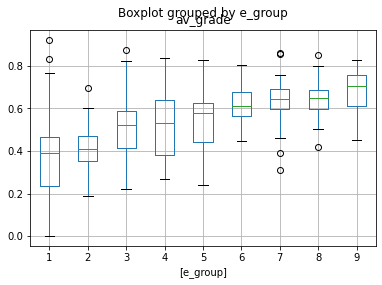

In [96]:
# Оценка явно зависит от кол-ва просмотренных объяснений
students.boxplot(column=['av_grade'], by=['e_group'])

In [ ]:
# Аналогично помотрим зависимость с другими параметрами (на примере времени на ответ)

<AxesSubplot:title={'center':'ques_time'}, xlabel='[e_group]'>

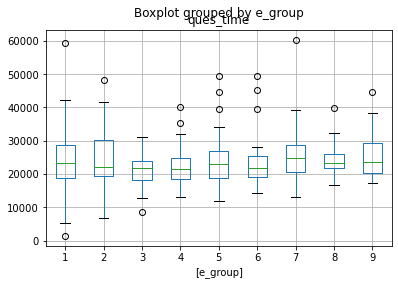

In [100]:
students.boxplot(column=['ques_time'], by=['e_group'])

In [ ]:
# Зависимость от кол-ва времени на ответ не так явна. 

In [ ]:
# Следующим шагом добавим следующий файл в анализируемые данные. 

In [102]:
questions = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Python\\HW 3 - Pandas\\questions.csv', sep=',',
                        dtype = {'question_id': 'int16', 'bundle_id': 'int16', 'correct_answer': 'int8',
                                 'part': 'int8', 'tags': 'object'
                               })
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


In [104]:
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [105]:
# question_id: foreign key for the train/test content_id column, when the content type is question (0).
# bundle_id: code for which questions are served together.
# correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
# part: the relevant section of the TOEIC test.
# tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

In [106]:
unique_list_q = []
for col in questions.columns:
    item = (col, questions[col].nunique(), questions[col].dtype)
    unique_list_q.append(item)
unique_counts_q = pd.DataFrame(unique_list_q,
                               columns=['Column_Name', 'Num_Unique', 'Type']
                              ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts_q)

,Column_Name,Num_Unique,Type
0,correct_answer,4,int8
1,part,7,int8
2,tags,1519,object
3,bundle_id,9765,int16
4,question_id,13523,int16


In [ ]:
# Мы видим, что 13523 вопроса разбиты на 4 части. Признак Bundle id не кажется интересным, а вот объединение с предыдущей таблицей может показать зависимость правильных ответов в каждой категории 

In [107]:
tmp_df = train.loc[(train.content_type_id == 0), ['content_id', 'answered_correctly']]

In [108]:
q_list = list(tmp_df['content_id'].unique())
len(q_list)

13523

In [111]:
lectures = pd.read_csv('C:\\Users\\shere\\OneDrive\\Рабочий стол\\MFTI\\Python\\HW 3 - Pandas\\lectures.csv', sep=',',
                      dtype = {'lecture_id': 'int16', 'tag': 'int16', 
                               'part': 'int8', 'type_of': 'object'})
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


In [113]:
# Для дальнейшего исследования лекций создадим единую таблицу по их ID с данными Train.
l_list = list(train[train['content_type_id'] == 1]['content_id'].unique())
len(l_list)

415

In [ ]:
# Посчитаем количество просмотров лекций для каждого id

l_quant = []
for l in l_list:
    tmp_l = train[(train['content_id'] == l)]['content_id'].count()
    l_quant.append(tmp_l)